<a href="https://colab.research.google.com/github/AriaAlaei/Washington-State-Electric-Cars/blob/main/Project_1_Washington_Electric_Cars_2024_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


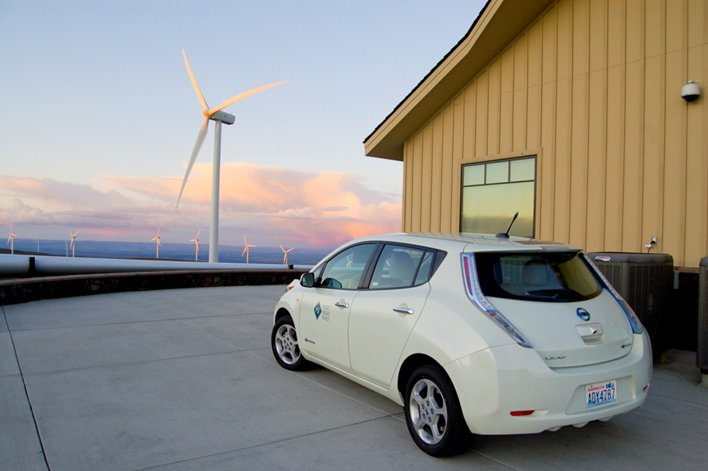

In [ ]:
import requests
import base64
from IPython.display import HTML


# Constants
# Updated Google Drive direct link for the new photo
IMAGE_URL = "https://drive.google.com/uc?export=view&id=1Gdhna4Q0q7sfjl8s2X6Aaawgcl6hyUGm"

def download_image_as_base64(url):
    """Downloads an image from the given URL and encodes it as a base64 string."""
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for HTTP errors
        return base64.b64encode(response.content).decode()
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None

# Fetch the image and encode as base64
image_base64 = download_image_as_base64(IMAGE_URL)

if image_base64:
    # HTML Template
    html_code = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Portfolio Header</title>
        <!-- Include Font Awesome -->
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 0;
                padding: 0;
            }}
            .header {{
                display: flex;
                align-items: flex-start;
                padding: 20px;
                background-color: #f4f4f4;
                border-bottom: 2px solid #ccc;
            }}
            .header img {{
                border-radius: 50%;
                width: 100px;
                height: 100px;
                object-fit: cover;
                margin-right: 20px;
                box-shadow: 0 0 20px #86e3dd;
            }}
            .header .text-container {{
                display: flex;
                flex-direction: column;
            }}
            .header h1 {{
                margin: 0;
                font-size: 2em;
            }}
            .header p {{
                margin: 5px 0 0 0;
                font-size: 1em;
                color: #666;
            }}
            .header .social-icons {{
                margin-top: 10px;
            }}
            .header .social-icons a {{
                margin-right: 10px;
                color: #666;
                text-decoration: none;
                font-size: 1.5em;
            }}
            .header .social-icons a:hover {{
                color: #000;
            }}
        </style>
    </head>
    <body>
        <header class="header">
            <img src="data:image/jpeg;base64,{image_base64}" alt="Profile Picture">
            <div class="text-container">
                <h1>Washington State Electric Car Demographic</h1>
                <p> :) </p>
                <p>#soft_skills #sql #python #tableau</p>
                &nbsp;
                <p>Aria Alaei</p>
                <div class="social-icons">
                    <a href="https://www.youtube.com/@AriaAlaei" target="_blank"><i class="fab fa-youtube"></i></a>
                    <a href="https://www.linkedin.com/in/ariaalaei/" target="_blank"><i class="fab fa-linkedin"></i></a>
                    <a href="mailto:info@ariaalaei.com"><i class="fas fa-envelope"></i></a>
                </div>
            </div>
        </header>
    </body>
    </html>
    """
    # Display the HTML
    display(HTML(html_code))
else:
    print("Failed to fetch the image. HTML not displayed.")





```
# This is formatted as code
```




##Step 1. Kick-off meeting with management

The state of Washington has approached data analysts to identify which cities and counties have the highest number of electric vehicles.

Their goal is to determine how to allocate budgets effectively and provide targeted incentives to encourage further adoption of electric cars.

Additionally, they aim to understand which car brands are the most popular across the state.

To achieve this, they require interactive dashboards built in Tableau that clearly present the analysis results. They have provided raw data that needs to be cleaned and optimized to deliver accurate and actionable insights.




## Step 2. Documenting a task during a meeting

**Goal**:  
Provide the state of Washington access to easy-to-understand dashboards that define the popularity of electric cars within different parts of the state.  

**Visualisation** (bar, pie, column, etc.):  

<figure>
  <left>
    <img src='https://drive.google.com/uc?export=view&id=18DWGuwanSmm80UZuxmEn_mOW2focK8CU' width='400'/>
    <figcaption>Popular types of visuals</figcaption>
  </left>
</figure>




#Hard skills

In [ ]:
# Step 1: Install required libraries (and downgrade prettytable to a compatible version)
!pip install gdown ipython-sql sqlalchemy prettytable==2.5.0

# Step 2: Import libraries
import pandas as pd
import sqlite3
import gdown

# Step 3: Download the new file
file_id = '1FobikZkaSZ74FEmlzPjHtLaNY9i_bPgd'  # Updated file ID for the new CSV
download_url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'new_dataset.csv'  # Updated output file name
gdown.download(download_url, output_file, quiet=False)

# Step 4: Load the CSV file into a pandas DataFrame
df = pd.read_csv(output_file)

# Step 5: Save the DataFrame to SQLite
database_filename = 'my_database.db'
conn = sqlite3.connect(database_filename)  # Create SQLite connection
df.to_sql('new_data', conn, if_exists='replace', index=False)  # Save DataFrame to the database with a new table name

# Step 6: Load ipython-sql extension
%load_ext sql

# Step 7: Connect to the SQLite database
%sql sqlite:///my_database.db

# Ensure the default style is used (no explicit style change)
%config SqlMagic.style = 'DEFAULT'




Downloading...
From: https://drive.google.com/uc?id=1FobikZkaSZ74FEmlzPjHtLaNY9i_bPgd
To: /content/new_dataset.csv
100%|██████████| 52.4M/52.4M [00:00<00:00, 130MB/s]


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
# @title Step 2. SQL — Query the data
# Query the data to see if it works
# Step 8: Query the database
project_data = %sql SELECT County, City, Make FROM new_data
%sql SELECT County, City, Make FROM new_data LIMIT 10



 * sqlite:///my_database.db
Done.
 * sqlite:///my_database.db
Done.


County,City,Make
King,Shoreline,NISSAN
King,Seattle,TESLA
Kitsap,Olalla,VOLKSWAGEN
Thurston,Olympia,TOYOTA
Thurston,Olympia,FORD
Snohomish,Bothell,TESLA
Snohomish,Bothell,TESLA
Kitsap,Poulsbo,JEEP
Thurston,Rochester,BMW
King,Burien,NISSAN


*Data Description*
<table>
  <thead>
    <tr>
      <th><b>Variable</b></th>
      <th><b>Definition</b></th>
      <th><b>Key</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>County</b></td>
      <td>The county where the vehicle is registered.</td>
      <td>N/A</td>
    </tr>
    <tr>
      <td><b>City</b></td>
      <td>The city where the vehicle is registered.</td>
      <td>N/A</td>
    </tr>
    <tr>
      <td><b>Make</b></td>
      <td>The manufacturer of the vehicle.</td>
      <td>E.g., Tesla, Nissan, Ford</td>
    </tr>
  </tbody>
</table>



In [ ]:
# @title Step 3. Python

# Get the data into the Python environment
# Assuming project_data is the result of the SQL query and is in tabular format (list of dictionaries)

# Convert project_data to pandas DataFrame
df = pd.DataFrame(project_data)

# Display the DataFrame
print(df.head(10))

# 3. General information about the DataFrame
print("Information about the DataFrame:")
print(df.info(), "\n")

# 4. Basic statistics for numeric columns
print("Statistical summary of numeric columns:")
print(df.describe(), "\n")

# 5. Check for missing values
print("Count of missing values in each column:")
print(df.isnull().sum(), "\n")

# 6. Data types of each column
print("Data types of columns:")
print(df.dtypes, "\n")






      County       City        Make
0       King  Shoreline      NISSAN
1       King    Seattle       TESLA
2     Kitsap     Olalla  VOLKSWAGEN
3   Thurston    Olympia      TOYOTA
4   Thurston    Olympia        FORD
5  Snohomish    Bothell       TESLA
6  Snohomish    Bothell       TESLA
7     Kitsap    Poulsbo        JEEP
8   Thurston  Rochester         BMW
9       King     Burien      NISSAN
Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   County  216767 non-null  object
 1   City    216767 non-null  object
 2   Make    216772 non-null  object
dtypes: object(3)
memory usage: 5.0+ MB
None 

Statistical summary of numeric columns:
        County     City    Make
count   216767   216767  216772
unique     205      762      44
top       King  Seattle   TESLA
freq    110164    34754   93931 

Count of missing values in 

In [ ]:
# 1. Count of each make of cars
if 'Make' in df.columns:
    # Ensure 'Make' column is normalized to uppercase
    df['Make'] = df['Make'].str.upper()
    make_counts = df['Make'].value_counts()
    make_count_dict = make_counts.to_dict()  # Store in a dictionary for lookup
    print("Count of each make of cars:")
    print(make_counts, "\n")
else:
    print("'Make' column is not in the dataset.\n")

# Get Tesla count from make_count_dict
tesla_count = make_count_dict.get('TESLA', 0)  # Correct casing
print(f"Tesla cars: {tesla_count}")

# 2. Count of electric cars in each city
if 'City' in df.columns and 'Make' in df.columns:
    city_counts = df.groupby('City')['Make'].count()
    city_count_dict = city_counts.to_dict()  # Store in a dictionary for lookup
    print("Count of electric cars in each city:")
    print(city_counts, "\n")
else:
    print("'City' or 'Make' column is not in the dataset.\n")

# Get count for Seattle
seattle_count = city_count_dict.get('Seattle'.upper(), 0)  # Normalize lookup
print(f"Electric cars in Seattle: {seattle_count}")

# 3. Count of electric cars in each county
if 'County' in df.columns and 'Make' in df.columns:
    county_counts = df.groupby('County')['Make'].count()
    county_count_dict = county_counts.to_dict()  # Store in a dictionary for lookup
    print("Count of electric cars in each county:")
    print(county_counts, "\n")
else:
    print("'County' or 'Make' column is not in the dataset.\n")

# Get count for King County
king_count = county_count_dict.get('King'.upper(), 0)  # Normalize lookup
print(f"Electric cars in King County: {king_count}")


Count of each make of cars:
Make
TESLA                   93931
CHEVROLET               15864
NISSAN                  15011
FORD                    11486
KIA                     10090
BMW                      8820
TOYOTA                   8543
HYUNDAI                  6304
RIVIAN                   6113
VOLKSWAGEN               5826
JEEP                     5636
VOLVO                    5292
AUDI                     4054
CHRYSLER                 3797
MERCEDES-BENZ            2057
SUBARU                   1611
HONDA                    1561
PORSCHE                  1305
POLESTAR                 1175
MINI                     1047
MITSUBISHI               1045
CADILLAC                  919
LEXUS                     835
MAZDA                     822
FIAT                      813
DODGE                     701
LINCOLN                   320
LUCID                     317
GENESIS                   297
SMART                     244
JAGUAR                    237
GMC                       209
FISKER 

In [ ]:
# Creating a CSV file for car type
df_car_type = pd.DataFrame(columns=['Make', 'Count'])

# Load your dataset (replace 'new_dataset.csv' with your actual file name)
df_car_data = pd.read_csv('new_dataset.csv')  # Renamed from 'df' to 'df_car_data'

# Normalize the 'Make' column to ensure consistency
df_car_data['Make'] = df_car_data['Make'].str.upper()

# Group by the 'Make' column and count the number of cars for each company
car_make_counts = df_car_data['Make'].value_counts().reset_index()

# Rename columns for clarity
car_make_counts.columns = ['Car Company (Make)', 'Count of Cars']

# Save the cleaned data to a new CSV file for Tableau
output_file = 'car_make_counts.csv'
car_make_counts.to_csv(output_file, index=False)

print(f"Data prepared and saved to {output_file}. Here is a preview:")
print(car_make_counts.head())





Data prepared and saved to car_make_counts.csv. Here is a preview:
  Car Company (Make)  Count of Cars
0              TESLA          93931
1          CHEVROLET          15864
2             NISSAN          15011
3               FORD          11486
4                KIA          10090


In [ ]:
# Creating a CSV file for city and number of cars
df_city_data = pd.DataFrame(columns=['City', 'Count'])  # Initialize DataFrame for clarity

# Load your dataset (replace 'new_dataset.csv' with your actual file name)
df_city_data = pd.read_csv('new_dataset.csv')  # Renamed from 'df' to 'df_city_data'

# Normalize the 'City' column to ensure consistency
df_city_data['City'] = df_city_data['City'].str.upper()

# Group by the 'City' column and count the number of cars for each city
city_car_counts = df_city_data['City'].value_counts().reset_index()

# Rename columns for clarity
city_car_counts.columns = ['City', 'Count of Cars']

# Save the cleaned data to a new CSV file for Tableau
output_file_city = 'city_car_counts.csv'
city_car_counts.to_csv(output_file_city, index=False)

print(f"Data prepared and saved to {output_file_city}. Here is a preview:")
print(city_car_counts.head())

# Save the city data to an XLSX file
output_file_city = 'city_car_counts.xlsx'
city_car_counts.to_excel(output_file_city, index=False)

print(f"City data saved to {output_file_city}. Here is a preview:")
print(city_car_counts.head())



Data prepared and saved to city_car_counts.csv. Here is a preview:
        City  Count of Cars
0    SEATTLE          34754
1   BELLEVUE          10726
2  VANCOUVER           7726
3    REDMOND           7655
4    BOTHELL           7061
City data saved to city_car_counts.xlsx. Here is a preview:
        City  Count of Cars
0    SEATTLE          34754
1   BELLEVUE          10726
2  VANCOUVER           7726
3    REDMOND           7655
4    BOTHELL           7061


In [ ]:
# Creating a CSV file for county and number of cars
df_county_data = pd.DataFrame(columns=['County', 'Count'])  # Initialize DataFrame for clarity

# Load your dataset (replace 'new_dataset.csv' with your actual file name)
df_county_data = pd.read_csv('new_dataset.csv')  # Renamed from 'df' to 'df_county_data'

# Normalize the 'County' column to ensure consistency
df_county_data['County'] = df_county_data['County'].str.upper()

# Group by the 'County' column and count the number of cars for each county
county_car_counts = df_county_data['County'].value_counts().reset_index()

# Rename columns for clarity
county_car_counts.columns = ['County', 'Count of Cars']

# Save the cleaned data to a new CSV file for Tableau
output_file_county = 'county_car_counts.csv'
county_car_counts.to_csv(output_file_county, index=False)

print(f"Data prepared and saved to {output_file_county}. Here is a preview:")
print(county_car_counts.head(14))

# Save the county data to an XLSX file
output_file_county = 'county_car_counts.xlsx'
county_car_counts.to_excel(output_file_county, index=False)

print(f"County data saved to {output_file_county}. Here is a preview:")
print(county_car_counts.head())



Data prepared and saved to county_car_counts.csv. Here is a preview:
       County  Count of Cars
0        KING         110164
1   SNOHOMISH          26200
2      PIERCE          17397
3       CLARK          12938
4    THURSTON           7938
5      KITSAP           7215
6     SPOKANE           5999
7     WHATCOM           5244
8      BENTON           2726
9      SKAGIT           2447
10     ISLAND           2302
11     YAKIMA           1340
12     CHELAN           1315
13    CLALLAM           1297
County data saved to county_car_counts.xlsx. Here is a preview:
      County  Count of Cars
0       KING         110164
1  SNOHOMISH          26200
2     PIERCE          17397
3      CLARK          12938
4   THURSTON           7938


In [ ]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1733590676957' style='position: relative'><noscript><a href='#'><img alt='Car_Per_City ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Car_Per_City&#47;Car_Per_City&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Car_Per_City&#47;Car_Per_City' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Car_Per_City&#47;Car_Per_City&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1733590676957');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")



In [ ]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1733590774801' style='position: relative'><noscript><a href='#'><img alt='Car_Per_County ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Car_Per_County&#47;Car_Per_County&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Car_Per_County&#47;Car_Per_County' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Car_Per_County&#47;Car_Per_County&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1733590774801');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")


In [ ]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1733590803298' style='position: relative'><noscript><a href='#'><img alt='CarCompanyType ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CarCompanyType&#47;CarCompanyType&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CarCompanyType&#47;CarCompanyType' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CarCompanyType&#47;CarCompanyType&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1733590803298');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")

[Link Tableau]()

[Link PBI]()

**Goal**:

**Assessment**: